In [2]:
from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
obs_data = np.random.randn(2*365, 34, 65)
model_data = np.random.randn(2*365, 34, 65)
sce_data = np.random.randn(365, 34, 65)

lat = range(34)
lon = range(65)

obs_data = xr.DataArray(obs_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
model_data = xr.DataArray(model_data, dims=['time','lat','lon'], \
                          coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
sce_data = xr.DataArray(sce_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2019-01-01', '2019-12-31', freq='D'), lat, lon])

# combining dataarrays to form dataset with same timelength otherwise correction will give error
ds = xr.Dataset({'model_data':model_data,'obs_data':obs_data, 'sce_data':sce_data})
ds['sce_data']

<xarray.DataArray 'sce_data' (time: 1095, lat: 34, lon: 65)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.11864894, -0.11546529, -0.25914227, ..., -0.96767745,
         -0.41147073, -0.25660231],
        [-0.01148542,  1.16228776, -0.84472432, ..., -1.60390037,
          0.6678887 , -1.62677361],
        [-0.77612396, -1.21638965,  1.76106057, ...,  1.66180568,
          0.18042145, -0.12463598]],

       [[-0.82944371,  0.29727736,  1.41298012, ...,  1.76072147,
         -1.24941835, -0.29015536],
        [-0.3776312 ,  0.74591173, -0.51923545, ..., -0.25710607,
          0.74146289, -1.84206838],
        [ 0.65879359,  0.21057552, -0.76759207, ...,  0.38951877,
         -0.30053862, -1.43321671],
        ...,
        [ 0.60959007, -0.09034794, -0.48737321, ...,  0.41678957,
          1.06198172, -0.0096422 ],
        [-0.17673121, -0.42661024, -0.30567168, ..., -0.0525485 ,
         -0.95591973,  0.08043519],
        [ 0.94712215,  0.90227116,  0.29656193, ...,  1.08653259,
          0.19797654, -1.48554906]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

In [18]:
ds


<xarray.Dataset>
Dimensions:     (time: 1095, lat: 34, lon: 65)
Coordinates:
  * time        (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat         (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32 33
  * lon         (lon) int64 0 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Data variables:
    model_data  (time, lat, lon) float64 1.533 2.027 -0.5321 ... nan nan nan
    obs_data    (time, lat, lon) float64 0.9337 0.7658 0.3138 ... nan nan nan
    sce_data    (time, lat, lon) float64 nan nan nan nan ... 1.087 0.198 -1.486

In [16]:
bc = XBiasCorrection(ds['obs_data'].isel(lat=2,lon=2), ds['model_data'].isel(lat=2,lon=2), ds['sce_data'].isel(lat=2,lon=2))
# df1 = bc.correct(method='modified_quantile')
# df2 = bc.correct(method='basic_quantile')
df3 = bc.correct(method='basic_quantile')

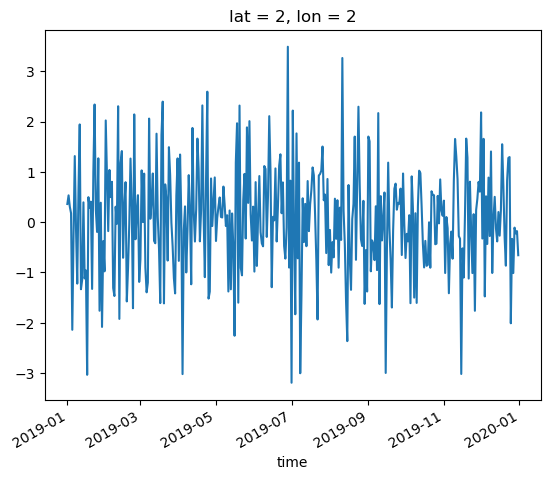

In [17]:
df3.plot()

In [10]:
bc.sce_data.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

TypeError: No numeric data to plot.

In [11]:
df3.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

TypeError: No numeric data to plot.